# Assignment 2

This is the first of two mandatory assignments which must be completed during the course. First some practical information:

* When is the assignment due?: **23:59, Friday, August 24, 2018**
* How do you grade the assignment?: You will **peergrade** each other as primary grading. 
* Must I hand-in as a group?: **yes**

The assigment consist of one to three problems from each of the exercise sets you have solved so far (excluding Exercise Set 1). We've tried to select problems which are self contained, but it might be nessecary to solve some of the previous exercises in each set to fully answer the problems in this assignment.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Problems from exercise set 11

> **_Hint:_** you can get data by running 

```python
iris = sns.load_dataset('iris')
iris = iris.query("species == 'virginica' | species == 'versicolor'").sample(frac = 1, random_state = 3)
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(iris['species'].map({'virginica': 1, 'versicolor': -1}))

# A very simple deterministic test-train split 
Xtrain = X[:70]
ytrain = y[:70]

Xtest = X[70:]
ytest = y[70:]
```

> The following code gives you the required functions to work with:

```python
def random_weights(location = 0.0, scale = 0.01, seed = 1):
    # Init random number generator
    rgen = np.random.RandomState(seed)
    w = rgen.normal(loc=location, scale=scale, size= 1 + X.shape[1])    
    return w

def net_input(X, W): 
    return np.dot(X, W[1:]) + W[0]   # Linear product X'W + bias


def predict(X, W):
    linProd = net_input(X, W)
    return np.where(linProd >= 0.0, 1, -1)    # 1(linProd > 0)
```


> **Ex. 11.1.5:** Write a function whichs loops over the training data (both X and y) using `zip`. For each row in the data, update the weights according to the perceptron rule (remember to update the bias in `w[0]`!). Set $\eta = 0.1$.
>
> Make sure the loop stores the total number of prediction errors encountered underways in the loop by creating an int which is incremented whenever you update the weights. 
>
>> _Hint:_ your function should return the updated weights, as well as the number of errors made by the perceptron.
>
>> _Hint:_ The following code block implements the function in _pseudo_code (it wont run, but serves to communicate the functionality).
>> ```
>> function f(X, y, W, eta):
>>    set errors = 0
>>
>>    for each pair xi, yi in zip(X,y) do:
>>        set update = eta * (yi - predict(xi, W))
>>        set W[1:] = W[1:] + update * xi
>>        set W[0] = W[0] + update
>>        set errors = errors + int(update != 0) 
>>
>>    return W, errors
>> ```
>
> *Bonus:* If you completed the previous bonus assignment, calculate the accuracy on training data using the updated weights. Any progress yet?

In [56]:
# Forbrænder: hent data og lav funktioner
iris = sns.load_dataset('iris')
iris = iris.query("species == 'virginica' | species == 'versicolor'").sample(frac=1, random_state = 3)
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(iris['species'].map({'virginica': 1, 'versicolor': -1}))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

# [Answer to Ex. 11.1.3]

def set_weights(columns_in_X) :
    return np.random.RandomState([1]).normal(loc=0, scale=.01, size=(1 + columns_in_X))

W = set_weights(X_train.shape[1])
    
# [Answer to Ex. 11.1.4]
def net_input(X, W) :
    return W[0] + X.dot(W[1:])

def predict(X, W) :
    return np.where(net_input(X, W)>= 0.0, 1, -1)

def accuracy(y, y_hat) :
    e = y-y_hat
    non_zero = np.count_nonzero(e)
    rows = len(y)
    return 1-(non_zero/rows)


In [58]:
# [Answer to Ex. 11.1.5]
def calc(X, y, W, eta) :
    errors = 0
    for x, y in zip(X,y) :
        update = eta * (y - predict(x, W))
        W[1:] = W[1:] + update * x
        W[0] = W[0] + update
        errors = errors + int(update != 0)
    return W, errors

calc(X_train, y_train, W, .1)

y_hat = predict(X_test, W)

print(accuracy(y_test, y_hat))


0.5


> **Ex. 11.1.6:** Write a function which repeat the updating procedure you constructed in 11.1.5 for `n_iter` times by packing the whole thing in an outer loop. Make sure you store the number of errors in each iteration in a list. 
>
> Plot the total errors after each iteration in a graph.
>
>> _Hint:_ Make sure you dont reset the weights after each iteration.
>
>> _Hint:_ Once again some pseudocode:
>> ```
>> function g(X, y, n_iter):
>>     set eta = 0.1
>>     set weights = random_weights()
>>     set errorseq = list()
>>
>>     for each _ in range(n_iter):
>>         weights, e = f(X, y, W, eta) 
>>         errorseq.append(e)
>>
>>     return weights, errorseq
>> ```
>
>> _Bonus:_ Wrap the code in a function called Perceptron.

[-1.24780146 -1.71059834 -1.35293204  2.34527672  2.43357654] 
 [5, 4, 4, 4, 2, 3, 4, 4, 4, 4]


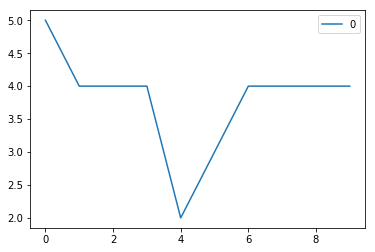

In [62]:
# [Answer to Ex. 11.1.6]
def Perceptron(X, y, n_iter) :
    eta = .001
    weights = set_weights(X.shape[1])
    errorseq = list()
    
    for i in range(n_iter) :
        weights, e = calc(X, y, W, eta)
        errorseq.append(e)
    
    return weights, errorseq

W, errorseq = Perceptron(X_train, y_train, 10)
print(W, '\n', errorseq)

df_error = pd.DataFrame(errorseq)

df_error.plot()

## Problems from exercise set 12
>Get the required data by running 

```python
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_house = fetch_california_housing()    
X = pd.DataFrame(data=cal_house['data'], 
                 columns=cal_house['feature_names'])\
             .iloc[:,:-2]
y = cal_house['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=1)
```

> **Ex. 12.2.0:** Load the california housing data with scikit-learn using the code above. Inspect the data set. 

In [3]:
# [Answer to Ex. 12.2.0]
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_house = fetch_california_housing()    
X = pd.DataFrame(data=cal_house['data'], 
                 columns=cal_house['feature_names'])\
             .iloc[:,:-2]
y = cal_house['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=1)

print(X_train.head(3))
print(len(X_train), len(y_train))

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
10089  4.0893      35.0  5.267760   0.983607      1056.0  2.885246
2136   3.7578      24.0  5.061538   0.957692       781.0  3.003846
17546  2.4306      39.0  4.899209   1.069170      1990.0  3.932806
10320 10320


> **Ex.12.2.1**: Generate interactions between all features to third degree, make sure you **exclude** the bias/intercept term. How many variables are there? Will OLS fail? 
>
> After making interactions rescale the features to have zero mean, unit std. deviation. Should you use the distribution of the training data to rescale the test data?  
>
>> *Hint 1*: Try importing `PolynomialFeatures` from `sklearn.preprocessing`
>
>> *Hint 2*: If in doubt about which distribution to scale, you may read [this post](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

In [4]:
# [Answer to Ex. 12.2.1]
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

print("Number of features:", len(X_train_poly[0]))
print(X_train_poly[0])

sc = StandardScaler()
sc.fit(X_train_poly)
X_train_std = sc.transform(X_train_poly)

print(X_train_std[0])

X_test_poly = poly.fit_transform(X_test)
X_test_std = sc.transform(X_test_poly)


Number of features: 83
[4.08930000e+00 3.50000000e+01 5.26775956e+00 9.83606557e-01
 1.05600000e+03 2.88524590e+00 1.67223745e+01 1.43125500e+02
 2.15414492e+01 4.02226230e+00 4.31830080e+03 1.17986361e+01
 1.22500000e+03 1.84371585e+02 3.44262295e+01 3.69600000e+04
 1.00983607e+02 2.77492908e+01 5.18140285e+00 5.56275410e+03
 1.51987817e+01 9.67481860e-01 1.03868852e+03 2.83794679e+00
 1.11513600e+06 3.04681967e+03 8.32464391e+00 6.83828060e+01
 5.85283107e+02 8.80894481e+01 1.64482372e+01 1.76588275e+04
 4.82481625e+01 5.00939250e+03 7.53950721e+02 1.40779180e+02
 1.51140528e+05 4.12952262e+02 1.13475175e+02 2.11883107e+01
 2.27477703e+04 6.21523780e+01 3.95632357e+00 4.24750898e+03
 1.16052158e+01 4.56012564e+06 1.24593597e+04 3.40419664e+01
 4.28750000e+04 6.45300546e+03 1.20491803e+03 1.29360000e+06
 3.53442623e+03 9.71225178e+02 1.81349100e+02 1.94696393e+05
 5.31957359e+02 3.38618651e+01 3.63540984e+04 9.93281376e+01
 3.90297600e+07 1.06638689e+05 2.91362537e+02 1.46176592e+02
 

## Answers
83 features. OLS will fail

Rescaling test data is **alway** done with the training data set

> **Ex.12.2.2**: Estimate the Lasso model on the train data set, using values of $\lambda$ in the range from $10^{-4}$ to $10^4$. For each $\lambda$  calculate and save the Root Mean Squared Error (RMSE) for the test and train data. 
>
>> *Hint*: use `logspace` in numpy to create the range.


In [5]:
# [Answer to Ex. 12.2.2]
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.pipeline import make_pipeline

perform = []
lambdas = np.logspace(-4,4,33)

for lambda_ in lambdas:
    pipe_lasso = Lasso(alpha=lambda_, random_state=1)
    pipe_lasso.fit(X_train_std, y_train)
    perform.append([lambda_, np.sqrt(mse(pipe_lasso.predict(X_train_std),y_train)), 
                    np.sqrt(mse(pipe_lasso.predict(X_test_std),y_test))])
    
pf = pd.DataFrame(perform)
headers = ['lambda', 'RMSE_train', 'RMSE_test']
pf.columns = headers
pf.set_index('lambda')


,RMSE_train,RMSE_test
lambda,,
0.000100,0.698086,8.369685
0.000178,0.697919,8.197186
0.000316,0.698191,7.904991
0.000562,0.699050,6.668735
0.001000,0.701839,4.682708
0.001778,0.708122,3.189027
0.003162,0.715467,2.374883
0.005623,0.730118,1.478429
0.010000,0.749733,0.762559


> **Ex.12.2.3**: Make a plot with on the x-axis and the RMSE measures on the y-axis. What happens to RMSE for train and test data as $\lambda$ increases? The x-axis should be log scaled. Which one are we interested in minimizing? 

> Bonus: Can you find the lambda that gives the lowest MSE-test score?

The lambda value with the lowest RMSE test score is 0.01 with the test RMSE 0.76256


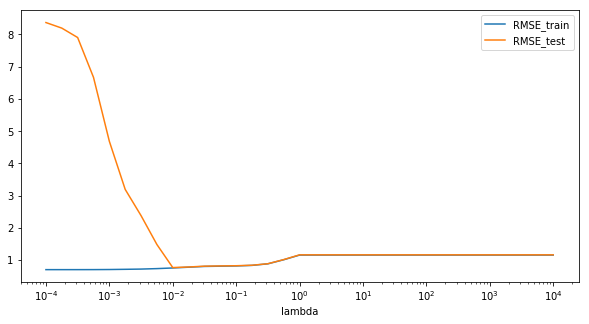

In [13]:
# [Answer to Ex. 12.2.3]

fig, ax = plt.subplots(figsize=(10,5))
plt.semilogx()
pf.plot(x='lambda', ax=ax)

print("The lambda value with the lowest RMSE test score is", 
      pf['lambda'].loc[pf.RMSE_test.idxmin()], "with the test RMSE",
      round(pf.RMSE_test.min(),5))


## Problems from exercise set 13

> **Ex. 13.1.3:**
Run a Lasso regression using the Pipeline from `Ex 13.1.2`. In the outer loop searching through the lambdas specified below. 
In the inner loop make 5 fold cross validation on the selected model and store the average MSE for each fold. Which lambda gives the lowest test MSE?
>
> ```python 
lambdas =  np.logspace(-4, 4, 12)
```
>
>> *Hint:* `KFold` in `sklearn.model_selection` may be useful.
>
> This code will give you the required data: 

In [15]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

cal_house = fetch_california_housing()    
#X = pd.DataFrame(data=cal_house['data'], 
#                 columns=cal_house['feature_names'])\
#             .iloc[:,:-2]
X = cal_house['data'][:,:-2]
y = cal_house['target']



In [59]:
# [Answer to Ex. 13.1.3]
from sklearn.model_selection import KFold

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

kfolds = KFold(n_splits=5)

mseCV = []

lambdas =  np.logspace(-5, 4, 12)

for lambda_ in lambdas:
   
    pipe_lassoCV = make_pipeline(PolynomialFeatures(include_bias=False),
                                 StandardScaler(),
                                 Lasso(alpha=lambda_, random_state=1))    
    mseCV_ = []
    
    for train_idx, val_idx in kfolds.split(X_dev, y_dev):
        X_train, y_train = X_dev[train_idx], y_dev[train_idx]
        X_val, y_val = X_dev[val_idx], y_dev[val_idx] 

        pipe_lassoCV.fit(X_train, y_train)
        
        msetest = mse(pipe_lassoCV.predict(X_test), y_test)
        mseCV_.append(msetest)    
    mseCV.append(np.mean(mseCV_))

optimal = pd.Series(mseCV,index=lambdas).nsmallest(1)
print("Optimal lambda")
print("lambda"," "*5, "Mean MSE")
print(optimal)


Optimal lambda
lambda       Mean MSE
0.000066    0.53723
dtype: float64


## Problems from exercise set 14

> **Ex. 14.1.3**: Train a decision tree classifier on **all** of the titanic data.
>
>* If your feature matrix is `X` and your target array is `y` you can do this by instantiating a model like:
>
        from sklearn.tree import DecisionTreeClassifier
        model = DecisionTreeClassifier()
        model.fit(X, y)  # <--- This is the training/fitting/learning step
>       
>Write four functions that counts the number of ..
 - true positives where we call the function `TP`;
 - true negatives where we call the function `TN`;
 - false positives where we call the function `FP`;
 - false negatives where we call the function `FN`.

> All of these functions should take three arguments, the actual y column, the actual X column and a fittedModel object (e.g. `fittedModel = DecisionTreeClassifier.fit(X,y)`)
>
>> _Hint 1:_ use the function `np.where` to compare y and the predicted values. For example `y + prediction == 2` is true only for the True Positives.
>
>> _Hint 2:_ You can check if your result is correct by summing all four functions and checking that the result equals to the number of observations. 
>
> Get the data by running:

In [60]:
rawdata = sns.load_dataset('titanic').sample(frac=1, random_state = 3)

# Feature creation
rawdata['male'] = (rawdata['sex'] == 'male').astype(int)
rawdata['alone'] = rawdata['alone'].astype(int)
rawdata['adult_male'] = rawdata['adult_male'].astype(int)


# The following piece of code (in multiple lines) generates 
# dummies for all of the categorical variables. 
data = pd.get_dummies(rawdata, 
                      columns = ['class', 'sibsp', 'parch', 'deck'], 
                      drop_first=True)\
         .drop(['pclass', 'sex', 'embarked', 'who', 'embark_town', 'alive'], axis = 1)


data = data.dropna().reset_index()

X = np.array(data.drop('survived', axis = 1))
y = np.array(data['survived'])

In [61]:
# [Answer to Ex 14.1.3]
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
a=model.fit(X, y)  # <--- This is the training/fitting/learning step

def TP(y_, X_, fittedModel_) :
    q_ = np.where(y_ + fittedModel_.predict(X_) == 2)
    return len(q_[0])
def TN(y_, X_, fittedModel_) :
    q_=np.where(y_ + fittedModel_.predict(X_) == 0)
    return len(q_[0])
def FP(y_, X_, fittedModel_) :
    q_=np.where(np.logical_and(y_ == 0, fittedModel_.predict(X_) == 1))
    return len(q_[0])
def FN(y_, X_, fittedModel_) :
    q_=np.where(np.logical_and(y_ == 1, fittedModel_.predict(X_) == 0))
    return len(q_[0])

print(TP(y, X, a))
print(TN(y, X, a))
print(FP(y, X, a))
print(FN(y, X, a))
      



290
424
0
0


> **Ex. 14.1.4:** Combine the four functions you defined above to write your own accuracy function, which calculates
$$
ACC = \frac{TP + TN}{TP+ TN + FP + FN}
$$
>
> Test the accuracy of your model using the `A` function. Report the accuracy of your model on the same data that you trained the model on.
>
>> _Note:_ The reason we want to split the calculation of accuracy into these four components, is that we can then easily calculate other scores, such as the _precision, recall and f1_.

In [62]:
# [Answer to Ex 14.1.4]
def accu(y_, X_, fittedModel_) :
    return round(100*(TP(y_, X_, fittedModel_)+TN(y_, X_, fittedModel_))/\
            (TP(y_, X_, fittedModel_)+TN(y_, X_, fittedModel_)\
            +FP(y_, X_, fittedModel_)+FN(y_, X_, fittedModel_)),2)


print(accu(y, X, a))


100.0


## Problems from exercise set 15 

> **Ex. 15.1.1:** 
Import the Counter object from the builtin package collections (Hint1). This is essentially a dictionary designed for keeping counts, same syntax, but extra functionality. We don't have to initialize each key. We can write: 

```python
c = Counter()
# then we can do this
c['hej']+=1
# without first defining c['hej'] = 0
```


>* Initialize a Counter object and assign it to the variable `dc` (document count).
>* Define a list named `text_counts`. In this container we will store each document after we have converted it to counts of tokens.
>* Run through all tokenized texts and
    * initialize a Counter object with the tokenized text as input, assign this object to a variable `c_t`. >This will now contain a count of each token in the document. Append `c_t` to our list `text_counts`.
    * run though each key in the `c_t` and increment the document count variable `dc` by one. (Hint2)

(hint1: from ... import ...)

(hint2: dc[token]+=1)

> Run the following code to get the data:

In [63]:
import nltk
nltk.download('punkt')
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv')
import re
token_re = re.compile('\w+')

tokenized = df.reviewBody.apply(nltk.word_tokenize)

tokenized[0]

[nltk_data] Downloading package punkt to C:\Users\Peter
[nltk_data]     Ottosen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Lots',
 'of',
 'inventory',
 ',',
 'very',
 'fast',
 'and',
 'efficient',
 '.',
 'I',
 'would',
 'recommend',
 'this',
 'company',
 '.']

In [65]:
# [Answer to Ex. 15.1.1]
from collections import Counter
dc = Counter()

text_counts=[]
for token in tokenized :
    c_t = Counter(token)
    text_counts.append(c_t)

#print(text_counts[0:3])

for count in text_counts :
    for key in count :
        dc[key] += 1
        
print(text_counts[:5])

number_docs = len(tokenized)


[Counter({'.': 2, 'Lots': 1, 'of': 1, 'inventory': 1, ',': 1, 'very': 1, 'fast': 1, 'and': 1, 'efficient': 1, 'I': 1, 'would': 1, 'recommend': 1, 'this': 1, 'company': 1}), Counter({'and': 4, '.': 4, 'was': 4, 'to': 4, 'I': 3, 'did': 3, 'map': 3, 'me': 3, 'the': 2, 'emailed': 2, 'an': 2, 'review': 2, 'my': 2, 'a': 2, 'not': 1, 'received': 1, 'had': 1, 'ordered': 1, 'paid': 1, 'for': 1, 'within': 1, 'stated': 1, 'delivery': 1, 'time': 1, 'Mapscompany': 1, 'their': 1, 'only': 1, 'first': 1, 'response': 1, 'send': 1, 'invitation': 1, 'experience': 1, '!': 1, 'My': 1, 'initial': 1, 'therefore': 1, 'extremely': 1, 'negative': 1, 'Since': 1, 'then': 1, 'support': 1, 'team': 1, 'member': 1, 'reassuring': 1, 'but': 1, 'ultimately': 1, "n't": 1, 'provide': 1, 'with': 1, 'any': 1, 'concrete': 1, 'information': 1, 'as': 1, 'where': 1, 'The': 1, 'eventually': 1, 'arrive': 1, 'is': 1, 'great': 1, ',': 1, 'so': 1, 'good': 1, 'end': 1, 'imperfect': 1, 'start': 1}), Counter({'I': 4, '.': 4, 'a': 3, 'a

> **Ex. 15.1.2:** 
Now we define the the inverse document frequency variable `idf` as a dictionary with the tokens as keys and idf weights as values. We do this by running through both the token and the value (document count) in the `dc` variable and calculate the ratio between number documents and the token document counts. 

>Use the `np.log` function for the log transform.

>We can iterate through this using the `.items()` syntax we know from the dictionary. 


In [67]:
# [Answer to Ex. 15.1.2]
idf={}
for key, value in dc.items() :
    idf[key] = np.log(number_docs/value)

print(idf)

{'Lots': 6.214608098422191, 'of': 1.3455363686477229, 'inventory': 6.214608098422191, ',': 0.9132952228943566, 'very': 1.7037485919053417, 'fast': 2.6809215337139576, 'and': 0.47578028202319006, 'efficient': 4.275866438845491, '.': 0.28156747145192695, 'I': 0.6709943759188121, 'would': 2.1515822194575183, 'recommend': 2.560061323388761, 'this': 2.0024805005437076, 'company': 2.6297012346912334, 'did': 2.5876040480263427, 'not': 1.995100393246085, 'received': 2.8788385220824915, 'the': 0.6780615431419045, 'map': 8.111728083308073, 'had': 1.989235273793687, 'ordered': 2.682382454353632, 'paid': 4.034190639402354, 'for': 1.2423671923132475, 'within': 3.8537540973041704, 'stated': 5.339139361068292, 'delivery': 3.0470255679415414, 'time': 2.0858621094827585, 'emailed': 5.278514739251857, 'Mapscompany': 9.210340371976184, 'their': 2.8455896151242714, 'only': 2.931818947810338, 'first': 3.151217176394386, 'response': 4.240527072400182, 'was': 1.0761660998382796, 'to': 0.7293963132350665, 'se

> **Ex. 15.1.3:** 
Now we weight the term frequency in each document with the idf value of each token. Here we used our `text_counts` variable that almost holds the frequency, we just need to divide by the number of tokens in the document. 
Define a list container: `tfidf_docs`. 

FIRST LOOP: For each counter in the text_count container:
    * define the variable `doc_n` as sum of all values in the counter - `.values()` .
    * define a dictionary named `tfidf`.
    * SECOND LOOP: run through all tokens, and their counts by using the `.items()` method of the counter.
        * define a value tf as the ratio between the count and the sum.
        * now weight this value with the idf weight found by calling the idf variable with the token as key.
        * assign this weighed term frequency to the tfidf[token].
    * Once outside the second loop. Append the tfidf dictionary to the tfidf_docs list container.

In [79]:
# [Answer to Ex. 15.1.3]
#[Answer 15.1.3]
tfidf_docs=[]
for counter in text_counts :
    doc_n = sum(counter.values()) # total number of words (non-unique) in each doc
    tfidf = {}
    for key, value in counter.items() :
        tf = value/doc_n
        tfidf[key] = tf * idf[key]
    tfidf_docs.append(tfidf)

print(tfidf_docs[0:5])


[{'Lots': 0.4143072065614794, 'of': 0.08970242457651485, 'inventory': 0.4143072065614794, ',': 0.06088634819295711, 'very': 0.1135832394603561, 'fast': 0.17872810224759716, 'and': 0.03171868546821267, 'efficient': 0.2850577625896994, '.': 0.037542329526923594, 'I': 0.04473295839458747, 'would': 0.1434388146305012, 'recommend': 0.17067075489258404, 'this': 0.13349870003624717, 'company': 0.17531341564608222}, {'I': 0.02212069371160919, 'did': 0.0853056279569124, 'not': 0.021924180145561373, 'received': 0.031635588154752654, 'the': 0.014902451497624276, 'map': 0.2674196071420244, 'had': 0.02185972828344711, 'ordered': 0.029476730267622334, 'and': 0.020913418990030335, 'paid': 0.04433176526815774, 'for': 0.013652386728717008, 'within': 0.04234894612422166, 'stated': 0.05867186111064058, 'delivery': 0.03348379744990705, 'time': 0.02292156164266768, '.': 0.012376592151733054, 'emailed': 0.11601131295059028, 'Mapscompany': 0.10121253156017784, 'their': 0.031270215550816174, 'only': 0.0322177

## Problems from exercise set 16


> **Ex. 16.2.5:** You should now implement it by doing the following:
* Define a maximum number of iterations`max_iter` to 15.
* Use the `initialize_clusters` function to define a variable `centroids`.
* make a `for` loop from 0 to max_iter where you: 
    * copy the current cluster centroids to a new variable: old_centroids. This will be used for checking convergence after the maximization step.
    * define the `cluster_assignment`  by running the `maximize` function
    * define a new (i.e. overwrite) `centroids` variable by running the `update_expectation` function.
    * finally check if old_centroids is equal to new_centroids, using the np.array_equal() function. If they are: break.

Make sure that it works and wrap it around a function `fit_transform()` that takes the data `X` as input, and the number of clusters `k` plus the maximum number of iterations `max_iter`. It should return the cluster assignments and the cluster centroids. 


> The code below will give you the dataset, as well as three functions you need to solve the exercise.

In [94]:
import seaborn as sns 
import pandas as pd 
import random
from sklearn.metrics import pairwise_distances

df = sns.load_dataset('iris')
X = df[['sepal_length','sepal_width','petal_length','petal_width']].values


def initialize_clusters(X_, k_) :
    return X_[random.sample(range(len(X_)),k_)]

def maximize(X_, s_) :
    d_ = pairwise_distances(X_, s_)
    return d_.argmin(axis=1)

def update_expectations(k_, X_, ca_) :
    nc_ = np.zeros((k_, X_.shape[1])) # 4 skal ændres til at være generisk antal kolonner i X

    for cluster_ in range(k_) :
        nc_[cluster_] = X_[ca_ == cluster_].mean(axis=0)
        
    return nc_



In [97]:
#[Answer exercise 16.2.5]
max_iter = 15
k = 3
def fit_transform(X_, k_, max_iter_) :    
    centroids_ = initialize_clusters(X_, k_)
    for it_ in range(max_iter_) :
        old_centroids_ = centroids_.copy
        cluster_assignment_ = maximize(X_, centroids_)
        centroids_ = update_expectations(k_, X_, cluster_assignment_)
        if np.array_equal(old_centroids_, centroids_) :
            break
    return centroids_, cluster_assignment_

centroid, cluster = fit_transform(X, k, max_iter)

print(centroid)
print(cluster)

[[5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
